<a href="https://colab.research.google.com/github/leohgs/data_science_projects/blob/main/LM_Penguins.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**ANÁLISE DATASET PENGUINS, DO SEABORN**

O dataset 'penguins' é um conjunto de dados disponível aos usuários do Seaborn, que possui diversos outros datasets interessantes para aprendizado e prática de técnicas de ciência de dados. Nosso objetivo com o estudo abaixo é, majoritariamente:

*   Realizar o tratamento e entendimento de estatísticas descritivas básicas do conjunto de dados;
*   Realizar a sua análise exploratória;
*   Tentar estruturar um modelo de regressão linear que nos permita predizer a variável 'peso' dos pinguins com base em outras variáveis quantitativas dos dataset.



IMPORTANDO BIBLIOTECAS E CARREGANDO CONJUNTO DE DADOS:

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [30]:
df = sns.load_dataset('penguins')

In [31]:
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


**TRATAMENTO DE DADOS**

Ao checar as dimensões de nosso conjunto de dados, vemos que existem 344 linhas de pinguins, com valores distribuídos entre 7 diferentes variáveis (colunas).

In [32]:
df.shape

(344, 7)

Vamos dar uma olhada nas informações gerais do df? O objetivo aqui é verificar se existem valores NaN a serem substituídos.



In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


Parece que existem alguns valores NaN, iremos substituí-los jajá. Antes, vamos apenas transformar a unidade de medida das colunas que estão em milímetro para centímetros, apenas para deixarmos a visualização mais fluída.

In [34]:
df['bill_length_mm'] = df['bill_length_mm'].map(lambda x: x / 10)
df['bill_depth_mm'] = df['bill_depth_mm'].map(lambda x: x / 10)
df['flipper_length_mm'] = df['flipper_length_mm'].map(lambda x: x / 10)

Mudando também os rótulos das colunas pra ficar tudo alinhado.

In [35]:
df.rename(columns={'bill_length_mm': 'bill_length_cm', 'bill_depth_mm': 'bill_depth_cm', 'flipper_length_mm': 'flipper_length_cm'}, inplace=True)

Tudo certo. Agora vamos arredondar e padronizar as casas decimais.

In [36]:
df.round(0)

,species,island,bill_length_cm,bill_depth_cm,flipper_length_cm,body_mass_g,sex
0,Adelie,Torgersen,4.0,2.0,18.0,3750.0,Male
1,Adelie,Torgersen,4.0,2.0,19.0,3800.0,Female
2,Adelie,Torgersen,4.0,2.0,20.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,4.0,2.0,19.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,5.0,1.0,22.0,4850.0,Female
341,Gentoo,Biscoe,5.0,2.0,22.0,5750.0,Male
342,Gentoo,Biscoe,5.0,1.0,21.0,5200.0,Female


Agora sim, é hora de substituirmos todos os valores NaN nas colunas que possuem.

In [41]:
df['bill_length_cm'].fillna(df['bill_length_cm'].mean(), inplace = True)
df['bill_depth_cm'].fillna(df['bill_depth_cm'].mean(), inplace = True)
df['flipper_length_cm'].fillna(df['flipper_length_cm'].mean(), inplace = True)
df['body_mass_g'].fillna(df['body_mass_g'].mean(), inplace = True)
df.dropna(inplace=True)

In [42]:
df.shape

(333, 7)

Ao remover os NaN, passamos a ter 333 linhas no dataframe.

Alguns Double Checks para certificarmos que os dados foram tratados com sucesso:

In [43]:
np.isnan(df.any())

species              False
island               False
bill_length_cm       False
bill_depth_cm        False
flipper_length_cm    False
body_mass_g          False
sex                  False
dtype: bool

In [44]:
np.isfinite(df.all())

species              True
island               True
bill_length_cm       True
bill_depth_cm        True
flipper_length_cm    True
body_mass_g          True
sex                  True
dtype: bool

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 333 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    object 
 1   island             333 non-null    object 
 2   bill_length_cm     333 non-null    float64
 3   bill_depth_cm      333 non-null    float64
 4   flipper_length_cm  333 non-null    float64
 5   body_mass_g        333 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 20.8+ KB


As variáveis categóricas que classificam nossos pinguins são: espécie, ilha e sexo. Além disso, temos 4 variáveis quantitativas com as quais podemos trabalhar nas análises descritivas e, por fim, buscar traçar predições.

In [47]:
df.describe()

,bill_length_cm,bill_depth_cm,flipper_length_cm,body_mass_g
count,333.000000,333.000000,333.000000,333.000000
mean,4.399279,1.716486,20.096697,4207.057057
std,0.546867,0.196924,1.401577,805.215802
min,3.210000,1.310000,17.200000,2700.000000
25%,3.950000,1.560000,19.000000,3550.000000
50%,4.450000,1.730000,19.700000,4050.000000
75%,4.860000,1.870000,21.300000,4775.000000
max,5.960000,2.150000,23.100000,6300.000000


Bastante útil o resumo estatístico acima, que nos traz informações interessantes, como a de que os pinguins tem peso médio de aproximadamente 4kg.

**ANÁLISE EXPLORATÓRIA DOS DADOS**

Como estão distribuidas a contagem de espécies em nosso dataset?

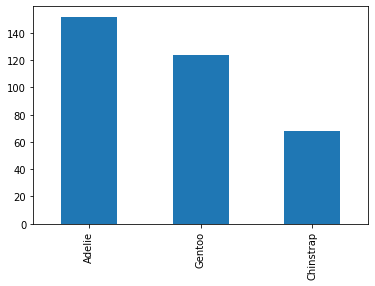

In [25]:
df['species'].value_counts().plot(kind='bar')

Vamos traçar um pairplot para visualizar facilmente a correlação entre todas as variáveis quantitativas:

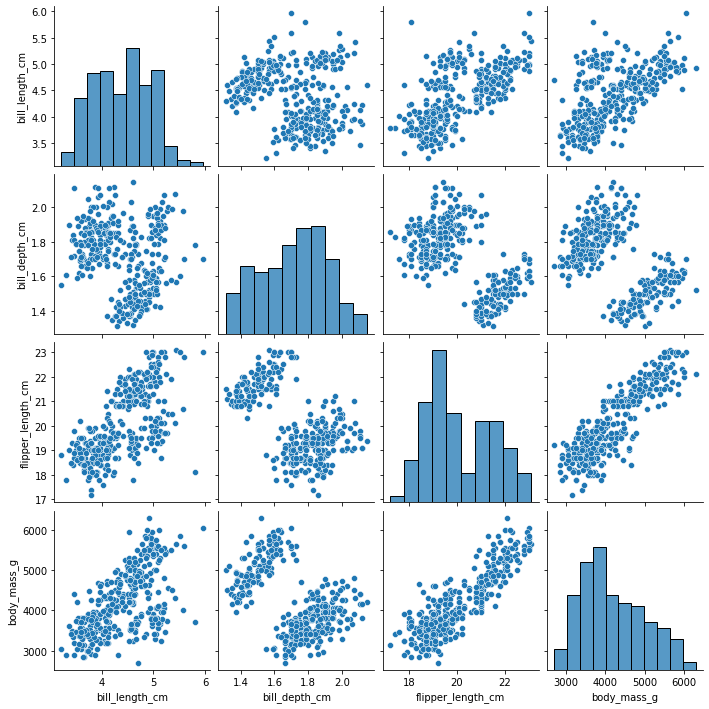

In [26]:
sns.pairplot(df, palette='winter')


*   Há forte correlação entre o peso dos pinguins e o tamanho da asa;



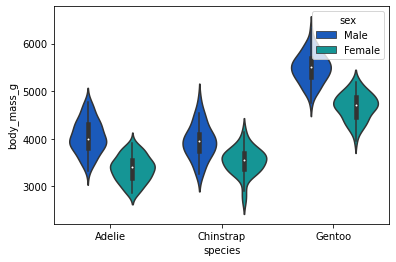

In [46]:
sns.violinplot(hue='sex', x='species', y='body_mass_g', data=df, palette='winter', size=(30, 20))

Como era esperado, as pinguins fêmeas possuem peso inferior.

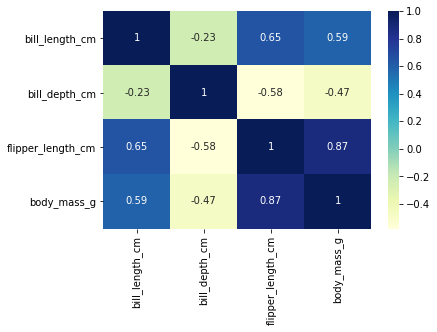

In [48]:
sns.heatmap(df.corr(), annot=True, cmap='YlGnBu')

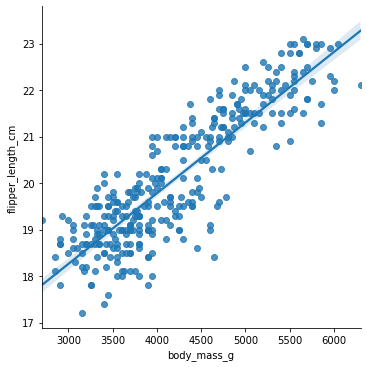

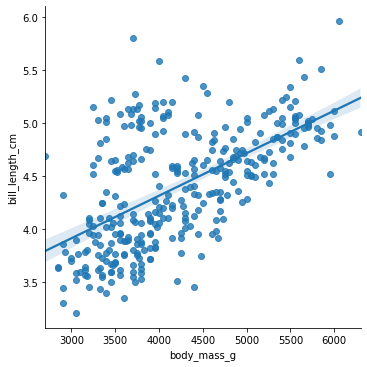

In [50]:
sns.lmplot(x='body_mass_g', y='flipper_length_cm', data=df)
sns.lmplot(x='body_mass_g', y='bill_length_cm', data=df)

De fato, fica comprovada a forte correlação entre as variáveis acima, principalmente quando estamos falando do tamanho da asa versus o peso de cada pinguim. Feito isso, já temos um norte para construção do nosso modelo de regressão linear.

REGRESSÃO LINEAR

Vamos definir a variável que queremos predizer (peso) e as variáveis preditoras abaixo:

In [52]:
y = df['body_mass_g']
x = df[['flipper_length_cm', 'bill_length_cm']]

In [53]:
from sklearn.model_selection import train_test_split

In [54]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [55]:
from sklearn.linear_model import LinearRegression

In [56]:
lm = LinearRegression()

In [57]:
lm.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [58]:
print('Coeficients: \n', lm.coef_)

Coeficients: 
 [483.62814649  91.45560959]


In [59]:
predictions = lm.predict(x_test)

Text(0, 0.5, 'Predicted Y')

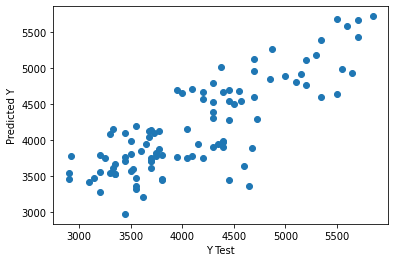

In [60]:
plt.scatter(y_test, predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

Parece que funcionou! Nosso modelo se mostrou bastante acurado, quando comparamos o Y Teste do conjunto de dados versus o Y predito pela modelagem.

Importante agora avaliar os resíduos de nosso modelo. O objetivo é fazer com que o histograma abaixo possua uma distribuição semelhante à normal.

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


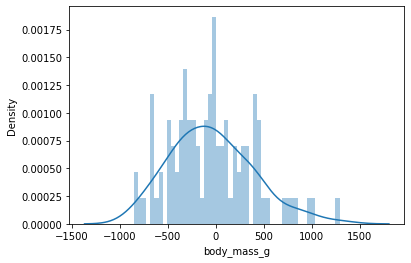

In [61]:
sns.distplot(y_test - predictions, bins=50)

Muito bom! Temos uma distribuição bem próxima da normal.